In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.metrics as metrics

100 100


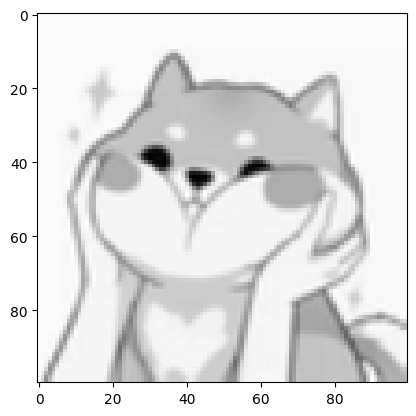

In [9]:
img_path = 'img/test3.png'
img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap="gray")
height,width= img.shape[:2] 
print(height,width)

#### 定义转换函数

In [10]:
# Define the predictor function 
def predictor(x):
  return x

# Define the quantizer function
def quantizer(x, bits):
  levels = 2**bits
  step = 256 / levels
  q = np.round(x / step) * step
  q = np.clip(q, 0, 255)
  return q

#### 定义DPCM函数

In [11]:
def dpcm_encoder(img, bits):
  # Get the image dimensions
  height, width = img.shape
  # Initialize the encoded image and the error image
  encoded = np.zeros_like(img)
  error = np.zeros_like(img)
  # Loop over the image pixels
  for i in range(height):
    for j in range(width):
      # If the first pixel, use the original value
      if i == 0 and j == 0:
        encoded[i,j] = img[i,j]
      # Else, use the predictor function and quantize the error
      else:
        pred = predictor(img[i,j-1])
        error[i,j] = img[i,j] - pred
        encoded[i,j] = quantizer(error[i,j], bits)
  return encoded

#### 定义DPCM解码函数

In [12]:
def dpcm_decoder(encoded):
  # Get the encoded image dimensions
  height, width = encoded.shape
  # Initialize the decoded image
  decoded = np.zeros_like(encoded)
  # Loop over the encoded pixels
  for i in range(height):
    for j in range(width):
      # If the first pixel, use the encoded value
      if i == 0 and j == 0:
        decoded[i,j] = encoded[i,j]
      # Else, use the predictor function and add the encoded error
      else:
        pred = predictor(decoded[i,j-1])
        decoded[i,j] = pred + encoded[i,j]
        # Clip the output to the range [0, 255]
        decoded[i,j] = np.clip(decoded[i,j], 0, 255)
  return decoded

#### 测试

进行编码和解码

In [13]:
# Encode and decode the image with different quantizers
encoded_1bit = dpcm_encoder(img, bits=1)
decoded_1bit = dpcm_decoder(encoded_1bit)
encoded_2bit = dpcm_encoder(img, bits=2)
decoded_2bit = dpcm_decoder(encoded_2bit)
encoded_4bit = dpcm_encoder(img, bits=4)
decoded_4bit = dpcm_decoder(encoded_4bit)
encoded_8bit = dpcm_encoder(img, bits=8)
decoded_8bit = dpcm_decoder(encoded_8bit)

C:\Users\yin\AppData\Local\Temp\ipykernel_14124\3389295324.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  error[i,j] = img[i,j] - pred
C:\Users\yin\AppData\Local\Temp\ipykernel_14124\2584429243.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  decoded[i,j] = pred + encoded[i,j]


展示结果

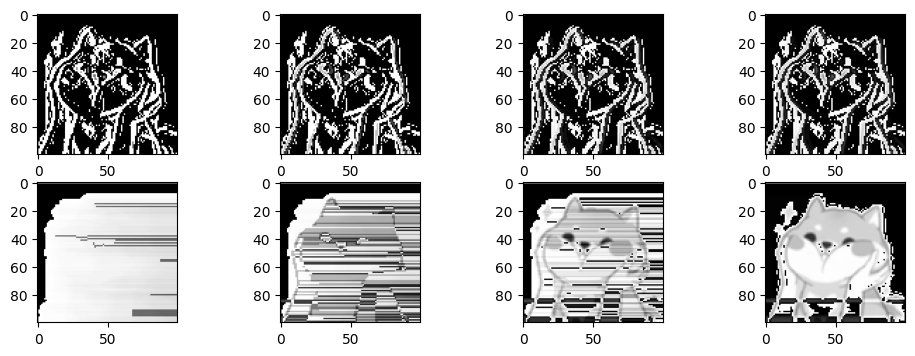

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(2,4,1)
plt.imshow(encoded_1bit, cmap="gray")
plt.subplot(2,4,2)
plt.imshow(encoded_2bit, cmap="gray")
plt.subplot(2,4,3)
plt.imshow(encoded_4bit, cmap="gray")
plt.subplot(2,4,4)
plt.imshow(encoded_8bit, cmap="gray")
plt.subplot(2,4,5)
plt.imshow(decoded_1bit, cmap="gray")
plt.subplot(2,4,6)
plt.imshow(decoded_2bit, cmap="gray")
plt.subplot(2,4,7)
plt.imshow(decoded_4bit, cmap="gray")
plt.subplot(2,4,8)
plt.imshow(decoded_8bit, cmap="gray")

计算重建图像的PSNR和SSIM值

In [15]:
# Calculate the PSNR and SSIM values of the reconstructed images
psnr_1bit = metrics.peak_signal_noise_ratio(img, decoded_1bit)
ssim_1bit = metrics.structural_similarity(img, decoded_1bit)
psnr_2bit = metrics.peak_signal_noise_ratio(img, decoded_2bit)
ssim_2bit = metrics.structural_similarity(img, decoded_2bit)
psnr_4bit = metrics.peak_signal_noise_ratio(img, decoded_4bit)
ssim_4bit = metrics.structural_similarity(img, decoded_4bit)
psnr_8bit = metrics.peak_signal_noise_ratio(img, decoded_8bit)
ssim_8bit = metrics.structural_similarity(img, decoded_8bit)

# Print the PSNR and SSIM values of the reconstructed images
print("PSNR and SSIM values of the reconstructed images:")
print("1-bit quantizer: PSNR =", psnr_1bit, "SSIM =", ssim_1bit)
print("2-bit quantizer: PSNR =", psnr_2bit, "SSIM =", ssim_2bit)
print("4-bit quantizer: PSNR =", psnr_4bit, "SSIM =", ssim_4bit)
print("8-bit quantizer: PSNR =", psnr_8bit, "SSIM =", ssim_8bit)

PSNR and SSIM values of the reconstructed images:
1-bit quantizer: PSNR = 8.013844467042194 SSIM = 0.258019527928983
2-bit quantizer: PSNR = 6.397828865010551 SSIM = 0.0570995661154056
4-bit quantizer: PSNR = 6.29069940718213 SSIM = 0.19316512297750907
8-bit quantizer: PSNR = 4.652979546647117 SSIM = 0.3777124069514521
